In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [18]:
filepath = "../data/data.csv"
df = pd.read_csv(filepath)

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229


In [20]:
df.shape

(1000, 10)

In [21]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
average_score                  0
total_score                    0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   average_score                1000 non-null   float64
 9   total_score                  1000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


In [24]:
df.nunique() #checking unique values in dataset

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
average_score                  194
total_score                    194
dtype: int64

In [25]:
df.describe() #checking the stats

,math_score,reading_score,writing_score,average_score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667,203.312000
std,15.16308,14.600192,15.195657,14.257326,42.771978
min,0.00000,17.000000,10.000000,9.000000,27.000000
25%,57.00000,59.000000,57.750000,58.333333,175.000000
50%,66.00000,70.000000,69.000000,68.333333,205.000000
75%,77.00000,79.000000,79.000000,77.666667,233.000000
max,100.00000,100.000000,100.000000,100.000000,300.000000


In [26]:
print("unique values in gender :",end=" ")
print(df['gender'].unique())
print("unique values in race_ethnicity :",end=" ")
print(df['race_ethnicity'].unique())
print("unique values in parental_level_of_education :",end=" ")
print(df['parental_level_of_education'].unique())
print("unique values in lunch :",end=" ")
print(df['lunch'].unique())
print("unique values in test_preparation_course :",end=" ")
print(df['test_preparation_course'].unique())


unique values in gender : ['female' 'male']
unique values in race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
unique values in parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique values in lunch : ['standard' 'free/reduced']
unique values in test_preparation_course : ['none' 'completed']


In [27]:
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O'] #if datatype object haina bhane it is stored here
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

print("We have {} numerical features :{}".format(len(numerical_features),numerical_features))
print("We have {} categorical features :{}".format(len(categorical_features),categorical_features))

We have 5 numerical features :['math_score', 'reading_score', 'writing_score', 'average_score', 'total_score']
We have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [28]:
df['total_score'] = df['math_score']+df["reading_score"]+df["writing_score"]
df['average_score'] = df['total_score']/3
df.to_csv(filepath,index=False)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229


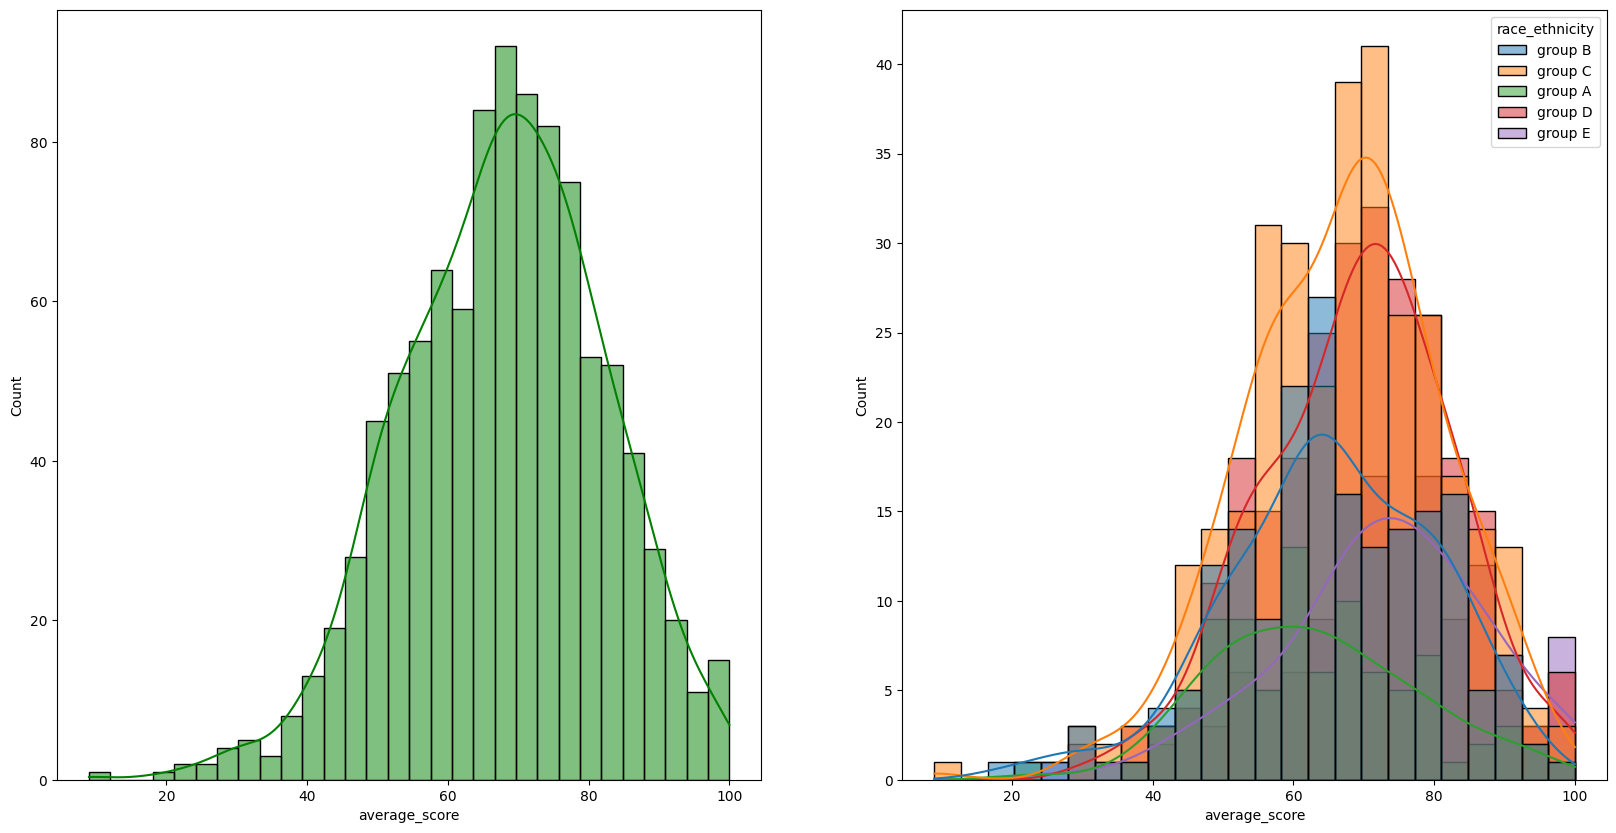

In [29]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121) #These commands create subplots with indices 121 and 122. The first digit (1) is the number of rows, the second digit (2) is the number of columns, and the third digit specifies the position.
sns.histplot(data=df , x ="average_score",bins = 30 ,kde=True ,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average_score",kde=True,hue="race_ethnicity")

plt.show()

#With kde=True, hue="gender", the histogram:
#Displays two KDE curves—one for males and one for females.
#Differentiates the data in the histogram using distinct colors for "Male" and "Female".

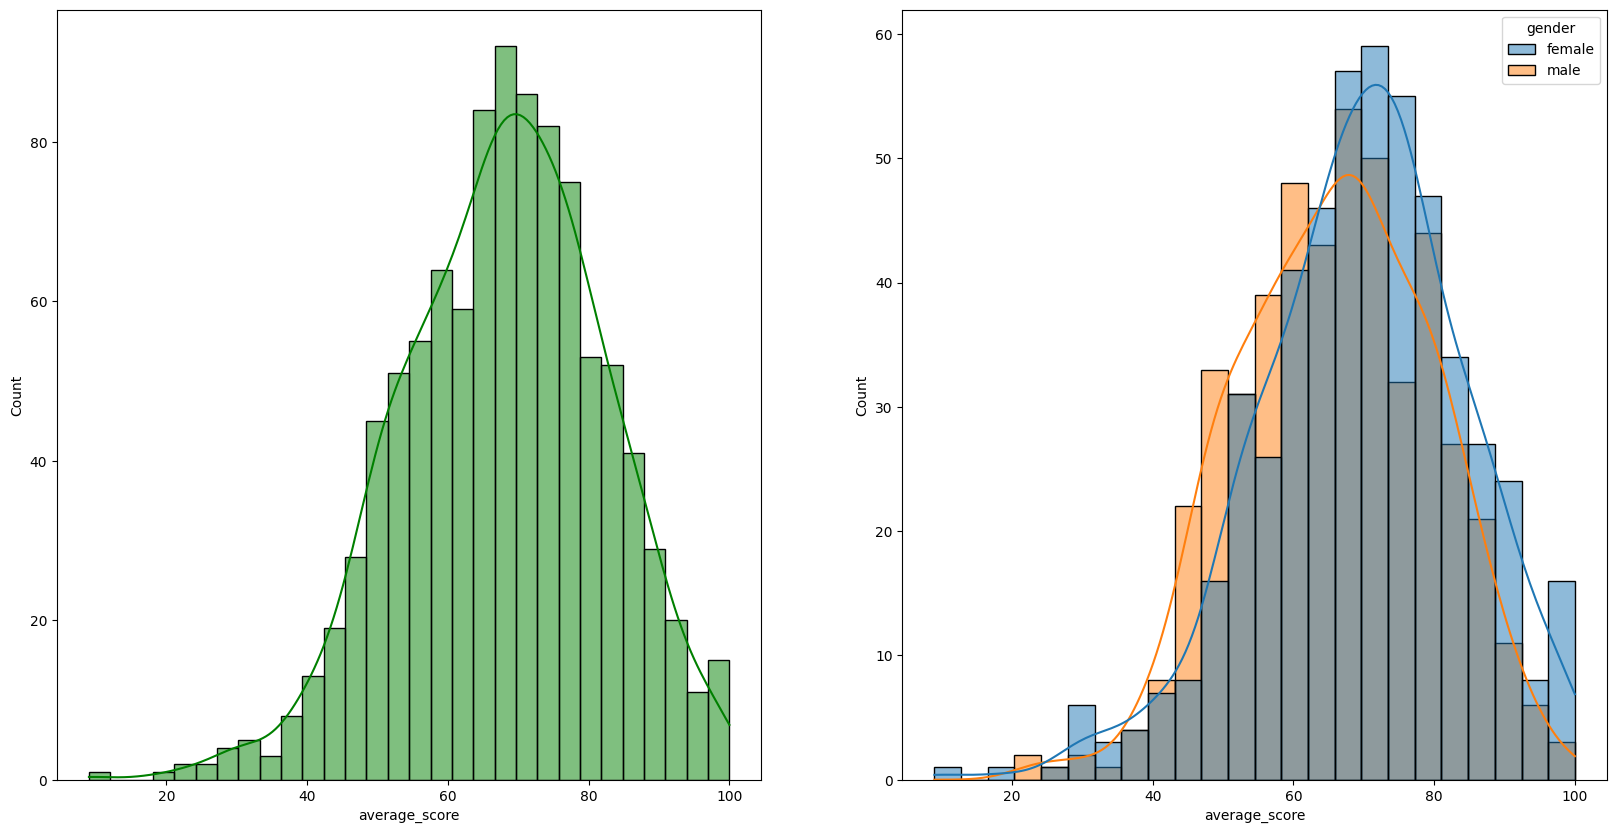

In [30]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121) #These commands create subplots with indices 121 and 122. The first digit (1) is the number of rows, the second digit (2) is the number of columns, and the third digit specifies the position.
sns.histplot(data=df , x ="average_score",bins = 30 ,kde=True ,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average_score",kde=True,hue="gender")

plt.show()

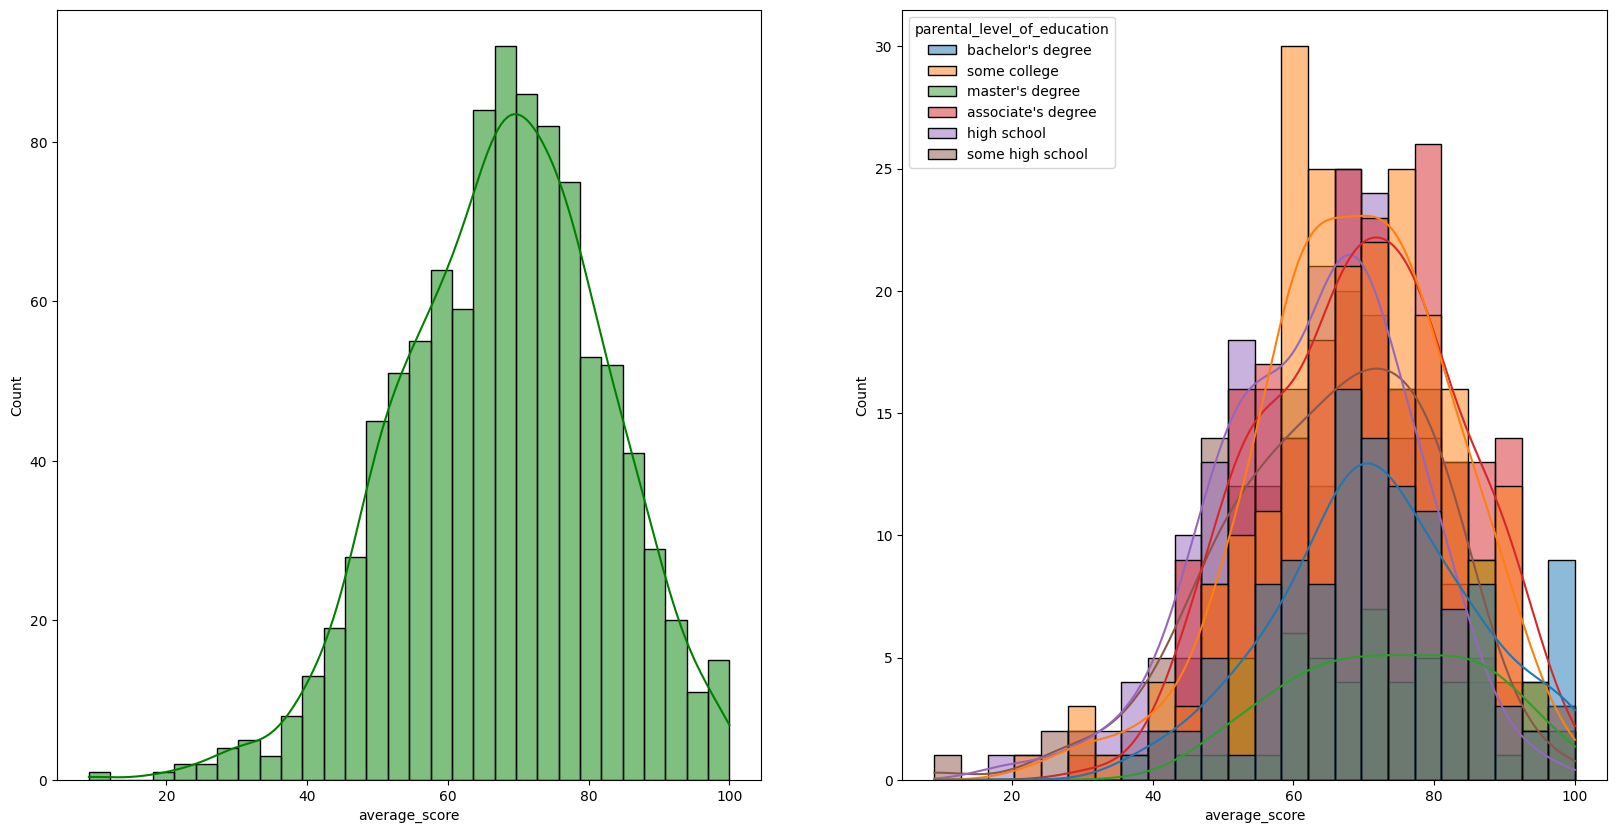

In [31]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121) #These commands create subplots with indices 121 and 122. The first digit (1) is the number of rows, the second digit (2) is the number of columns, and the third digit specifies the position.
sns.histplot(data=df , x ="average_score",bins = 30 ,kde=True ,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average_score",kde=True,hue="parental_level_of_education")

plt.show()

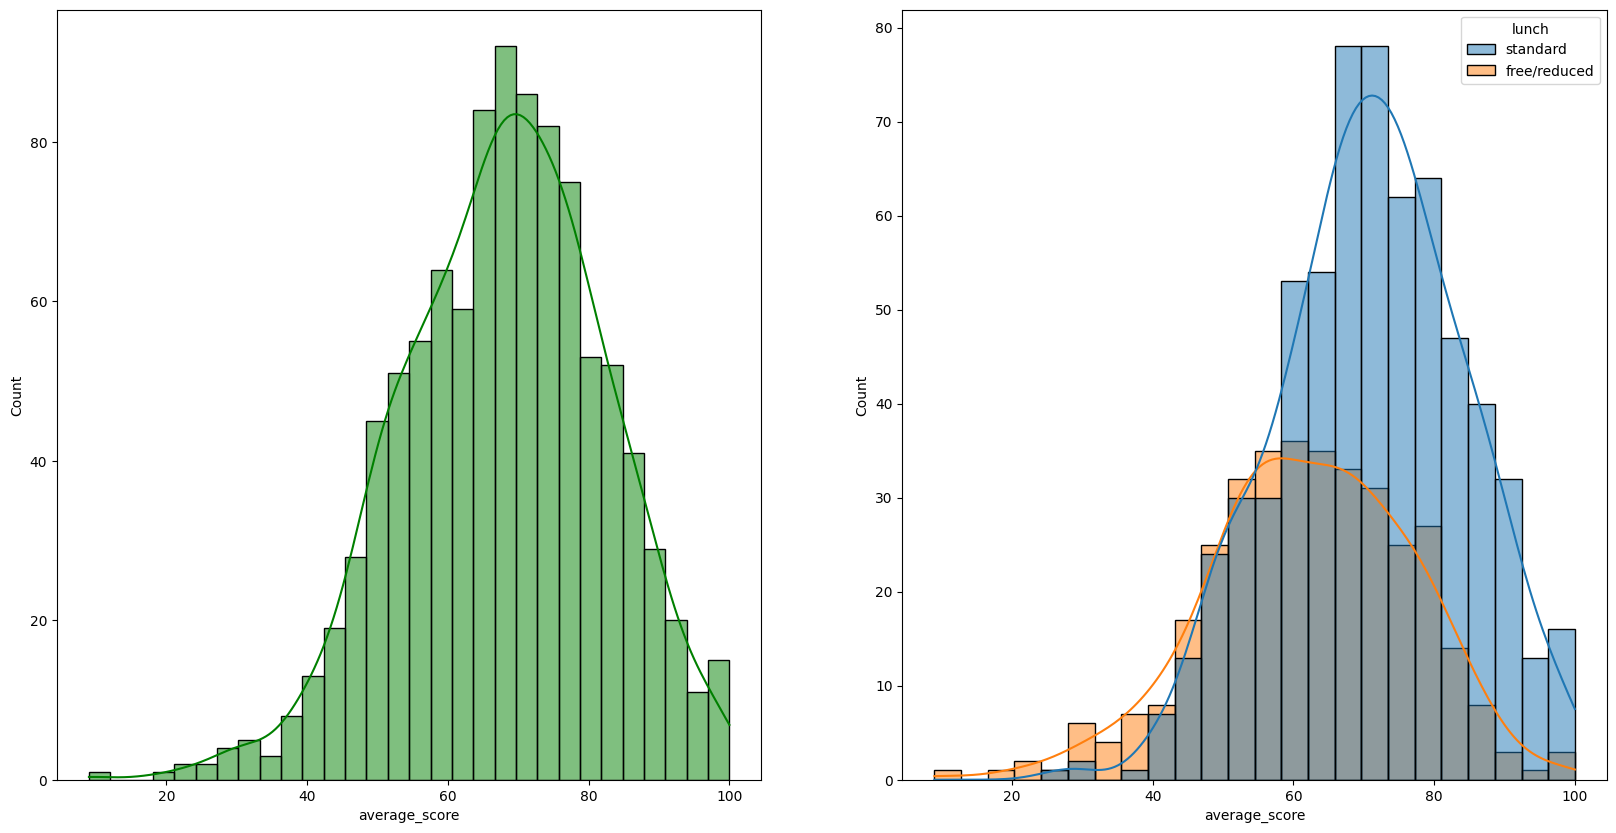

In [32]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121) #These commands create subplots with indices 121 and 122. The first digit (1) is the number of rows, the second digit (2) is the number of columns, and the third digit specifies the position.
sns.histplot(data=df , x ="average_score",bins = 30 ,kde=True ,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average_score",kde=True,hue="lunch")

plt.show()

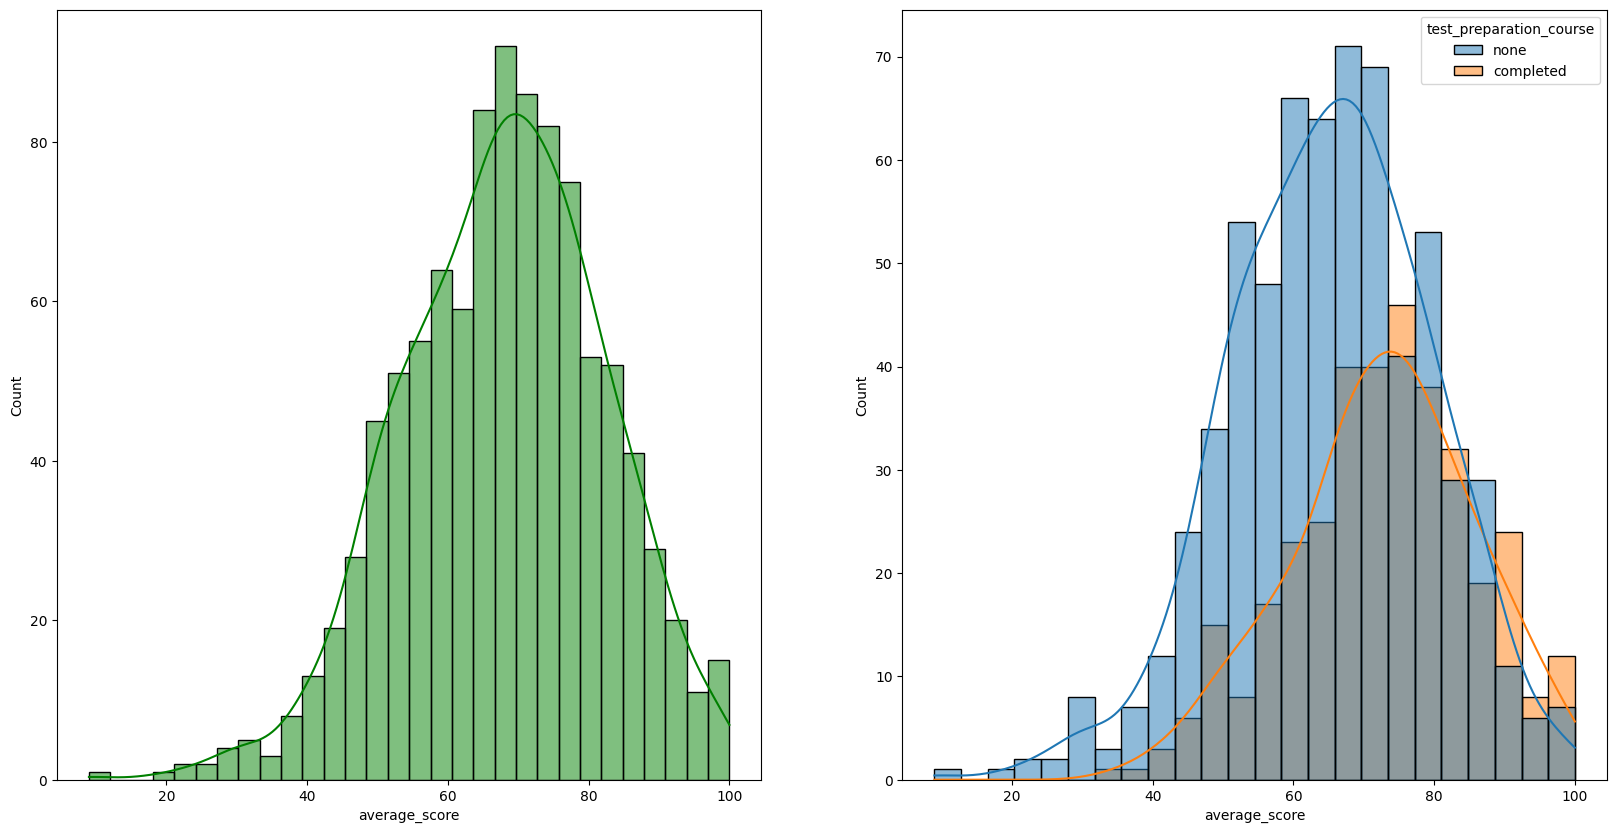

In [33]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
plt.subplot(121) #These commands create subplots with indices 121 and 122. The first digit (1) is the number of rows, the second digit (2) is the number of columns, and the third digit specifies the position.
sns.histplot(data=df , x ="average_score",bins = 30 ,kde=True ,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average_score",kde=True,hue="test_preparation_course")

plt.show()